# Employee EDA Graph Documentation

This document provides an exploratory data analysis (EDA) of employee data, focusing on visualizations to understand key trends and distributions within the dataset.

### Data Upload
This cell uses the `files.upload()` function from `google.colab` to allow you to upload a file from your local machine to the Colab environment. The uploaded file is stored in the `uploaded` variable.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving employee_dataset (1).csv to employee_dataset (1) (1).csv


### Spark Session and Data Loading
This cell initializes a Spark session and loads the uploaded CSV file into a Spark DataFrame.
- `SparkSession.builder.getOrCreate()` creates or gets an existing Spark session.
- `spark.read.csv(...)` reads the CSV file, with `header=True` to indicate that the first row is the header and `inferSchema=True` to automatically detect the data types.
- `df.show(20)` displays the first 20 rows of the DataFrame to give you a preview of the data.

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.read.csv("employee_dataset (1).csv", header=True, inferSchema=True)
df.show(20)

+----------+---------+----------+------+---+-----------+--------------------+-------+----------+
|EmployeeID|FirstName|  LastName|Gender|Age| Department|            JobTitle| Salary|  HireDate|
+----------+---------+----------+------+---+-----------+--------------------+-------+----------+
|         1|   Ayesha|     Manda|  Male| 55| IT Support|  Operations Manager| 809060|2019-06-13|
|         2|    Renee|    Mannan|Female| 38|Engineering|Marketing Specialist|1247238|2024-09-29|
|         3|  Nishith|  Malhotra|  Male| 52|      Admin|   Software Engineer|1928669|2015-11-09|
|         4|   Pranay|   Mallick|Female| 52|Engineering|   Software Engineer| 380105|2016-04-15|
|         5|  Reyansh|     Uppal|Female| 23| Operations|          Accountant|1993508|2024-05-10|
|         6|   Stuvan|      Lata|Female| 35|Engineering|   Software Engineer| 316962|2019-06-17|
|         7|   Dhanuk|    Master|Female| 44| Operations|Marketing Specialist|1664387|2020-11-13|
|         8|    Hiran|     Sal

### Import Libraries
This cell imports the necessary libraries for data visualization and manipulation:
- `seaborn` and `matplotlib.pyplot` are used for creating plots.
- `pyspark.sql.functions` provides various functions for working with Spark DataFrames.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import *

### Employees per Department (Histogram)
This cell generates a histogram showing the number of employees in each department.
- It first collects all department values from the DataFrame into a Python list.
- `plt.hist()` creates the histogram, with `bins` set to the number of unique departments to create a bar for each department.
- Labels and a title are added for clarity.

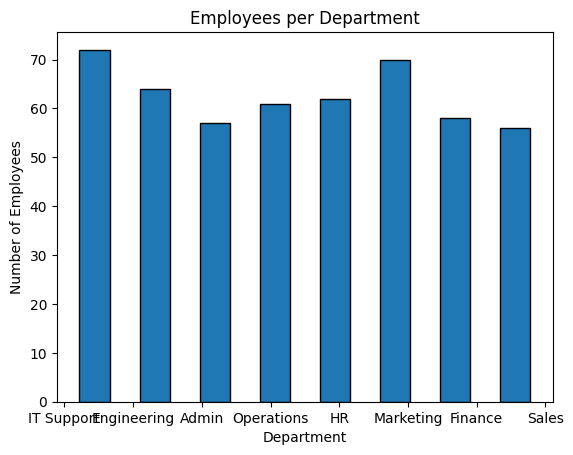

In [ ]:
# Get all department values into a list
departments = [row["department"] for row in df.select("department").collect()]

# Plot histogram
plt.hist(departments, bins=len(set(departments)), edgecolor="black",rwidth = 0.5)
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.title("Employees per Department")
plt.show()

### Employees per Department (Pie Chart)
This cell generates a pie chart showing the proportion of employees in each department.
- It collects department values, finds unique departments, and counts the occurrences of each.
- `plt.pie()` creates the pie chart, with `autopct="%1.1f%%"` to display the percentage on each slice.
- The figure size is adjusted for better visualization.

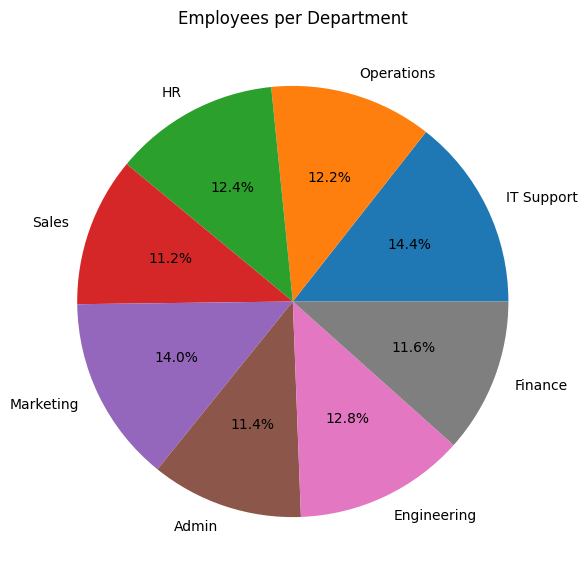

In [ ]:
# Get all department values from dataframe
departments = [row["department"] for row in df.select("department").collect()]

# Get unique departments and their counts
unique_departments = list(set(departments))
counts = [departments.count(dept) for dept in unique_departments]

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(counts, labels=unique_departments, autopct="%1.1f%%")
plt.title("Employees per Department")
plt.show()

### Employees Hired Per Year (Bar Graph)
This cell generates a bar graph showing the number of employees hired each year.
- It extracts the year from the 'hiredate' column.
- It counts the number of employees for each year.
- The years are sorted for proper display on the x-axis.
- `plt.bar()` creates the bar graph.

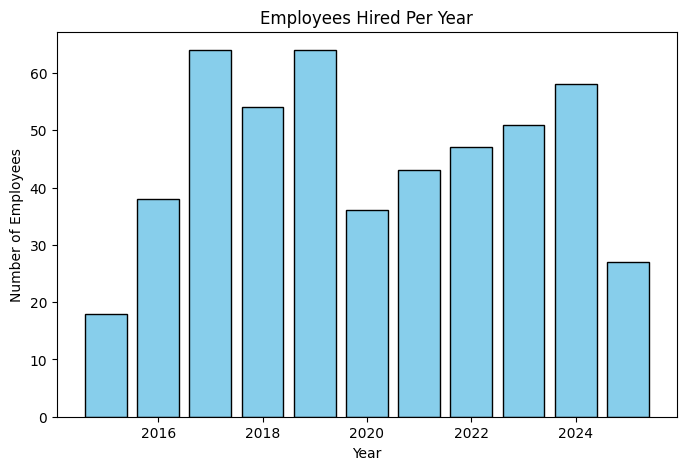

In [ ]:
# Get the year from hiredate and collect
years = [row["hiredate"].year for row in df.select("hiredate").collect()]

# Count employees per year
unique_years = list(set(years))
employee_counts = [years.count(year) for year in unique_years]

# Sort years for proper display
unique_years, employee_counts = zip(*sorted(zip(unique_years, employee_counts)))

# Plot bar graph
plt.figure(figsize=(8, 5))
plt.bar(unique_years, employee_counts, color="skyblue", edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Number of Employees")
plt.title("Employees Hired Per Year")
plt.show()

### Employees Hired Per Year (Scatter Plot)
This cell generates a scatter plot showing the number of employees hired each year, with an optional line connecting the points to show the trend over time.
- It extracts the year and counts employees per year, similar to the bar graph.
- `plt.scatter()` creates the scatter plot.
- `plt.plot()` adds a dashed line connecting the data points.

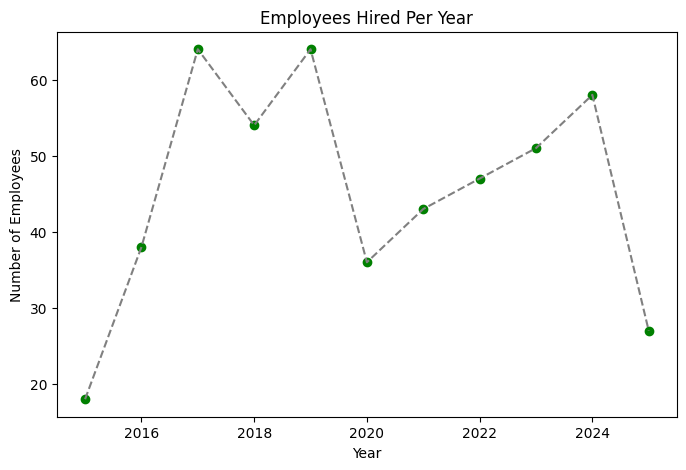

In [ ]:
# Extract year from hiredate
years = [row["hiredate"].year for row in df.select("hiredate").collect()]

# Count number of employees per year
unique_years = list(set(years))
employee_counts = [years.count(year) for year in unique_years]

# Sort years for proper x-axis
unique_years, employee_counts = zip(*sorted(zip(unique_years, employee_counts)))

# Plot scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(unique_years, employee_counts, color="green")
plt.plot(unique_years, employee_counts, linestyle="--", color="gray")  # optional line to connect points
plt.xlabel("Year")
plt.ylabel("Number of Employees")
plt.title("Employees Hired Per Year")
plt.show()

### Age Distribution by Department (Violin Plot)
This cell generates a violin plot to visualize the distribution of age within each department.
- The Spark DataFrame is converted to a Pandas DataFrame for easier plotting with Matplotlib.
- Data is prepared as a list of age lists, one for each department.
- `plt.violinplot()` creates the violin plot, showing the distribution shape, mean, and median.
- X-axis labels are set to department names and rotated for readability.

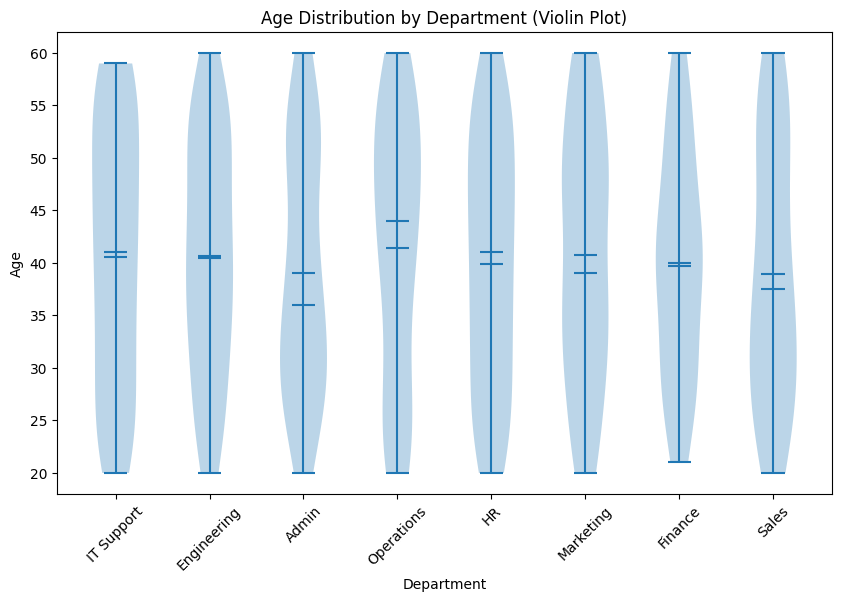

In [ ]:
# Convert Spark DataFrame to Pandas for easier plotting
pdf = df.select("age", "department").toPandas()

# Prepare data for violin plot: list of ages for each department
data = [pdf[pdf["department"] == dept]["age"] for dept in pdf["department"].unique()]

# Plot violin plot
plt.figure(figsize=(10, 6))
plt.violinplot(data, showmeans=True, showmedians=True)

# Set x-axis labels as department names
plt.xticks(range(1, len(pdf["department"].unique()) + 1), pdf["department"].unique(), rotation=45)
plt.xlabel("Department")
plt.ylabel("Age")
plt.title("Age Distribution by Department (Violin Plot)")
plt.show()

### Age Distribution by Department (Box Plot)
This cell generates a box plot to visualize the age distribution by department.
- The Spark DataFrame is converted to a Pandas DataFrame.
- `sns.boxplot()` from Seaborn creates the box plot, which shows the quartiles, median, and outliers for age in each department.
- X-axis labels are rotated for better readability.

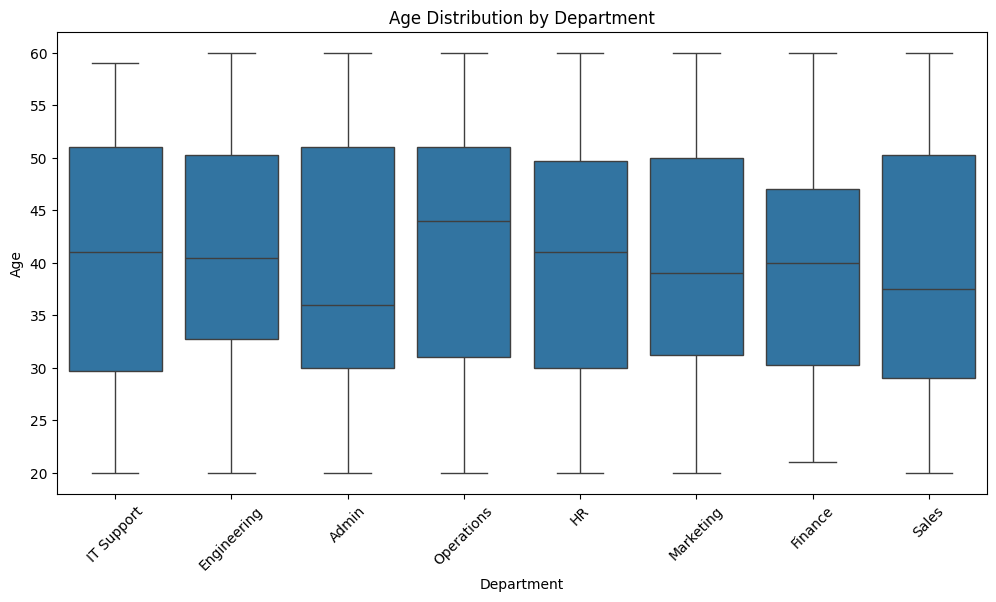

In [ ]:
# Convert Spark DataFrame to Pandas
pdf = df.select("age", "department").toPandas()

# Plot count plot: x = department, y = age
plt.figure(figsize=(12, 6))
sns.boxplot(x="department", y="age", data=pdf)
plt.xlabel("Department")
plt.ylabel("Age")
plt.title("Age Distribution by Department")
plt.xticks(rotation=45)
plt.show()

### Number of Employees by Age (Line Graph)
This cell generates a line graph showing the number of employees at each age.
- It collects age values and counts the occurrences of each age.
- The ages are sorted for proper display on the x-axis.
- `plt.plot()` creates the line graph with markers at each data point.
- A grid is added for easier reading of the plot.

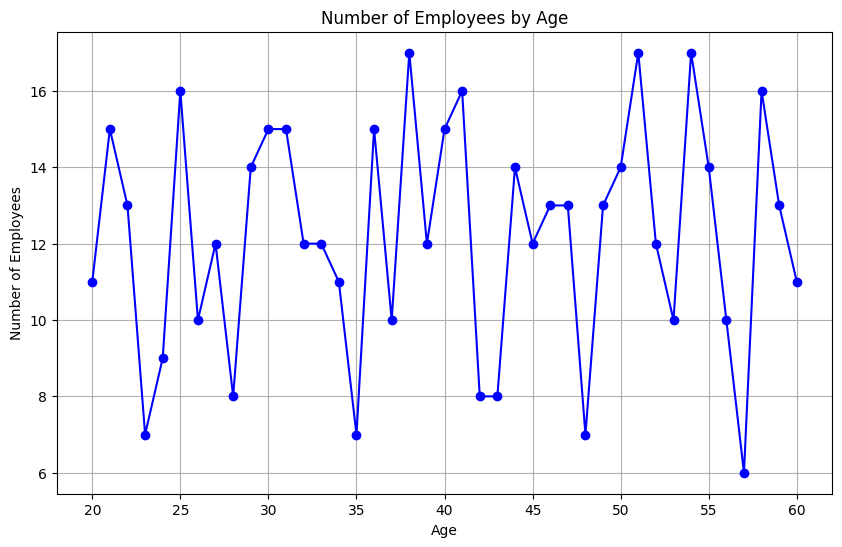

In [ ]:
# Get age data from Spark DataFrame
ages = [row["age"] for row in df.select("age").collect()]

# Count number of employees for each age
unique_ages = sorted(list(set(ages)))
employee_counts = [ages.count(age) for age in unique_ages]

# Plot line graph
plt.figure(figsize=(10, 6))
plt.plot(unique_ages, employee_counts, marker='o', color='blue')
plt.xlabel("Age")
plt.ylabel("Number of Employees")
plt.title("Number of Employees by Age")
plt.grid(True)
plt.show()

### Number of Employees by Age and Department (Stacked Bar Chart)
This cell generates a stacked bar chart showing the number of employees by age, segmented by department.
- The Spark DataFrame is converted to a Pandas DataFrame.
- `pivot_table()` is used to restructure the data for the stacked bar chart, with age as rows, department as columns, and employee counts as values.
- `plot(kind="bar", stacked=True)` creates the stacked bar chart.
- A legend is included to identify the departments.

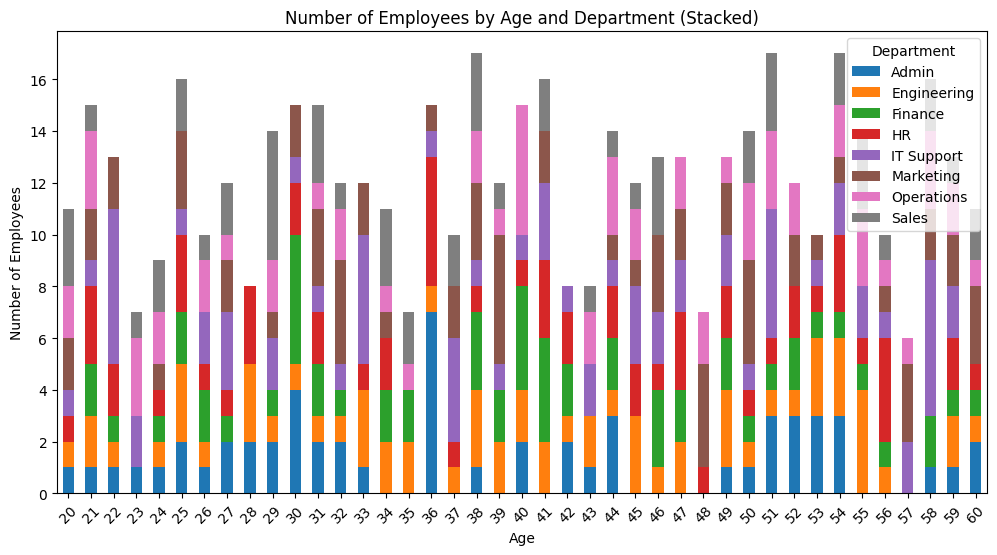

In [ ]:
# Convert Spark DataFrame to Pandas
pdf = df.select("age", "department").toPandas()

# Create a pivot table: rows = age, columns = department, values = counts
pivot_table = pdf.pivot_table(index="age", columns="department", aggfunc='size', fill_value=0)

# Plot stacked bar chart
pivot_table.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.xlabel("Age")
plt.ylabel("Number of Employees")
plt.title("Number of Employees by Age and Department (Stacked)")
plt.legend(title="Department")
plt.xticks(rotation=45)
plt.show()

### Number of Employees by Gender in Each Department (Count Plot)
This cell generates a count plot showing the number of male and female employees in each department.
- The Spark DataFrame is converted to a Pandas DataFrame.
- `sns.countplot()` from Seaborn creates the count plot, with `hue="gender"` to separate bars by gender.
- A different color palette is used for visual distinction.

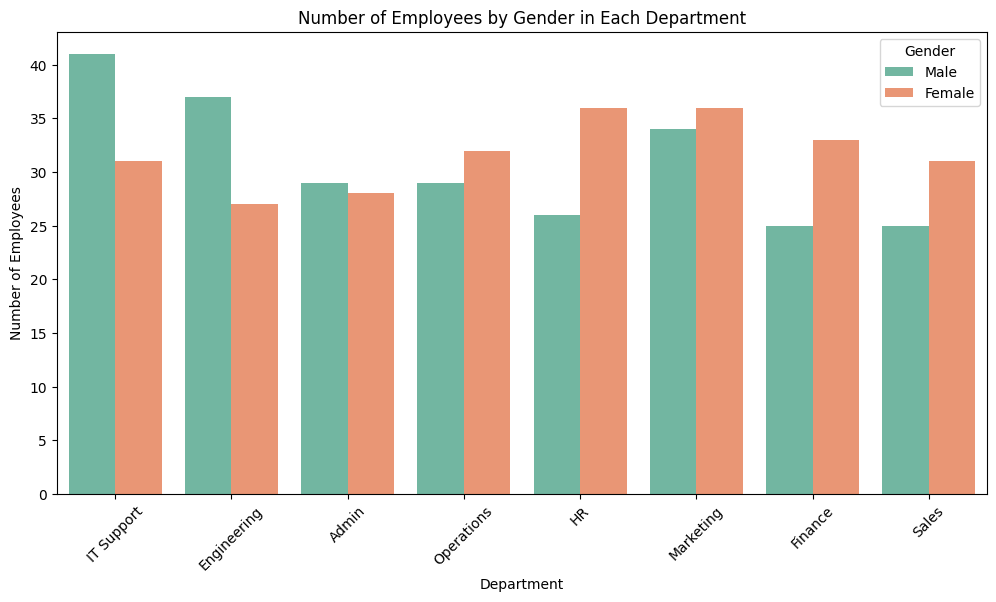

In [ ]:
# Convert Spark DataFrame to Pandas
pdf = df.select("department", "gender").toPandas()

# Count plot: x = department, hue = gender
plt.figure(figsize=(12, 6))
sns.countplot(x="department", hue="gender", data=pdf, palette="Set2")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.title("Number of Employees by Gender in Each Department")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()

### Employees per Department per Year (Heatmap)
This cell generates a heatmap showing the number of employees hired in each department for each year.
- It extracts the year from the 'hiredate' column and groups the data by department and year to count employees.
- The data is collected to the driver and processed to create a matrix suitable for the heatmap.
- `sns.heatmap()` from Seaborn creates the heatmap, with annotations showing the counts.
- A color map (`cmap="YlGnBu"`) is used to represent the counts visually.

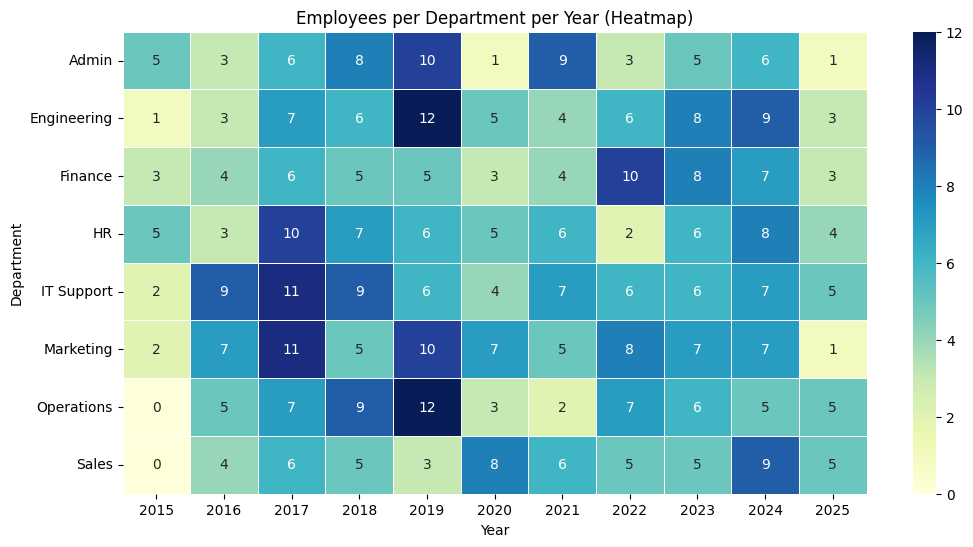

In [ ]:
# Extract year from hiredate
from pyspark.sql.functions import year
df_year = df.withColumn("year", year("hiredate"))

# Group by department and year, count employees
grouped = df_year.groupBy("department", "year").count()

# Collect to driver
data = grouped.collect()

# Prepare lists for heatmap
departments = sorted(set([row["department"] for row in data]))
years = sorted(set([row["year"] for row in data]))

# Create matrix (rows = departments, cols = years)
matrix = []
for dept in departments:
    row_counts = []
    for yr in years:
        found = next((r["count"] for r in data if r["department"] == dept and r["year"] == yr), 0)
        row_counts.append(found)
    matrix.append(row_counts)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=years, yticklabels=departments, linewidths=0.5)

plt.xlabel("Year")
plt.ylabel("Department")
plt.title("Employees per Department per Year (Heatmap)")
plt.show()